Decision Tree

Assignment


About the data:
Let’s consider a Company dataset with around 10 variables and 400 records.
The attributes are as follows:
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this:

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree #create the plot of the tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score



#Data preprocessing and reading

In [2]:
Data=pd.read_csv("/content/Company_Data.csv")

In [3]:
data=pd.DataFrame(Data)

In [4]:
data=data[["CompPrice",	"Income",	"Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US","Sales"]]

In [5]:
data.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22
2,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06
3,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40
4,141,64,3,340,128,Bad,38,13,Yes,No,4.15


In [6]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])


In [7]:
mean_value = data['Sales'].mean()
print(mean_value)

7.496325000000001


In [8]:
def categorize(Sales):
    if Sales > mean_value:
        return 'High'
    else:
        return 'Low'


data['Sales_values'] = data['Sales'].apply(categorize)


In [9]:
data["Sales_values"]

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales_values, Length: 400, dtype: object

In [10]:
data.head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Sales_values
0,138,73,11,276,120,0,42,17,1,1,9.50,High
1,111,48,16,260,83,1,65,10,1,1,11.22,High
2,113,35,10,269,80,2,59,12,1,1,10.06,High
3,117,100,4,466,97,2,55,14,1,1,7.40,Low
4,141,64,3,340,128,0,38,13,1,0,4.15,Low


In [11]:
data.value_counts("Sales_values")   #taget variable

Sales_values
Low     201
High    199
dtype: int64

In [12]:
data.shape

(400, 12)

In [13]:
data.isna().sum()

CompPrice       0
Income          0
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
Sales           0
Sales_values    0
dtype: int64

In [14]:
data.corr()

<ipython-input-14-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,0.064079
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,0.151951
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,0.269507
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,0.050471
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,-0.444951
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,0.157470
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,-0.231815
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,-0.051955
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,-0.015419
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000,0.177093


<ipython-input-15-714e3f7cceb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

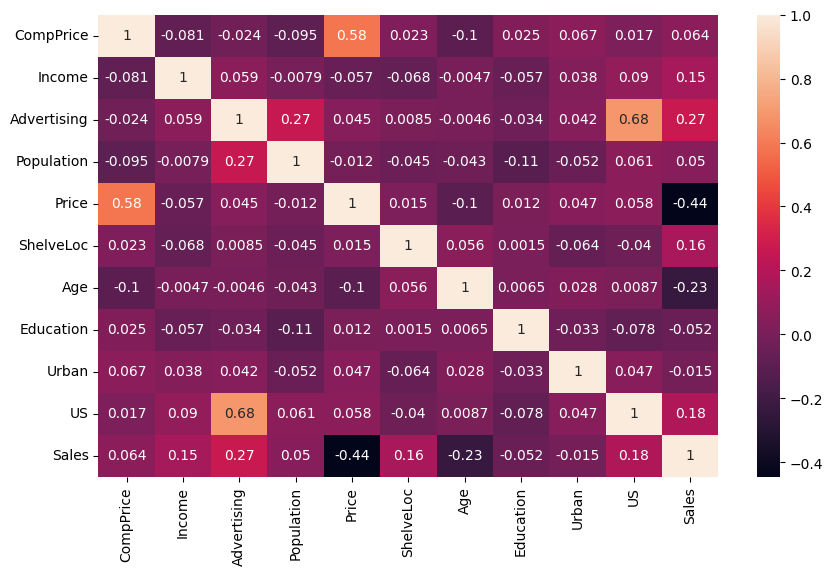

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

<ipython-input-16-d89b2ab0316c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Income"])


<Axes: xlabel='Income', ylabel='Density'>

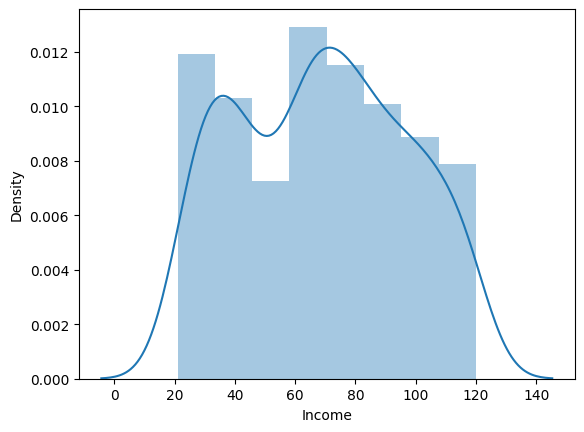

In [16]:
sns.distplot(data["Income"])

In [17]:
x=data.iloc[:,:10]
y=data['Sales_values']

In [18]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=15)

#Model using gini impurity

In [19]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth=5,)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [20]:
#tree.plot_tree(model)

[Text(0.46551724137931033, 0.9166666666666666, 'Price <= 101.5\ngini = 0.5\nsamples = 320\nvalue = [161, 159]\nclass = High'),
 Text(0.28448275862068967, 0.75, 'CompPrice <= 120.5\ngini = 0.353\nsamples = 83\nvalue = [64, 19]\nclass = High'),
 Text(0.1896551724137931, 0.5833333333333334, 'ShelveLoc <= 0.5\ngini = 0.453\nsamples = 52\nvalue = [34, 18]\nclass = High'),
 Text(0.10344827586206896, 0.4166666666666667, 'Income <= 88.0\ngini = 0.475\nsamples = 18\nvalue = [7, 11]\nclass = low'),
 Text(0.06896551724137931, 0.25, 'Age <= 34.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]\nclass = low'),
 Text(0.034482758620689655, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = High'),
 Text(0.10344827586206896, 0.08333333333333333, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = low'),
 Text(0.13793103448275862, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = High'),
 Text(0.27586206896551724, 0.4166666666666667, 'Price <= 92.5\ngini = 0.327\nsamples = 34\nvalu

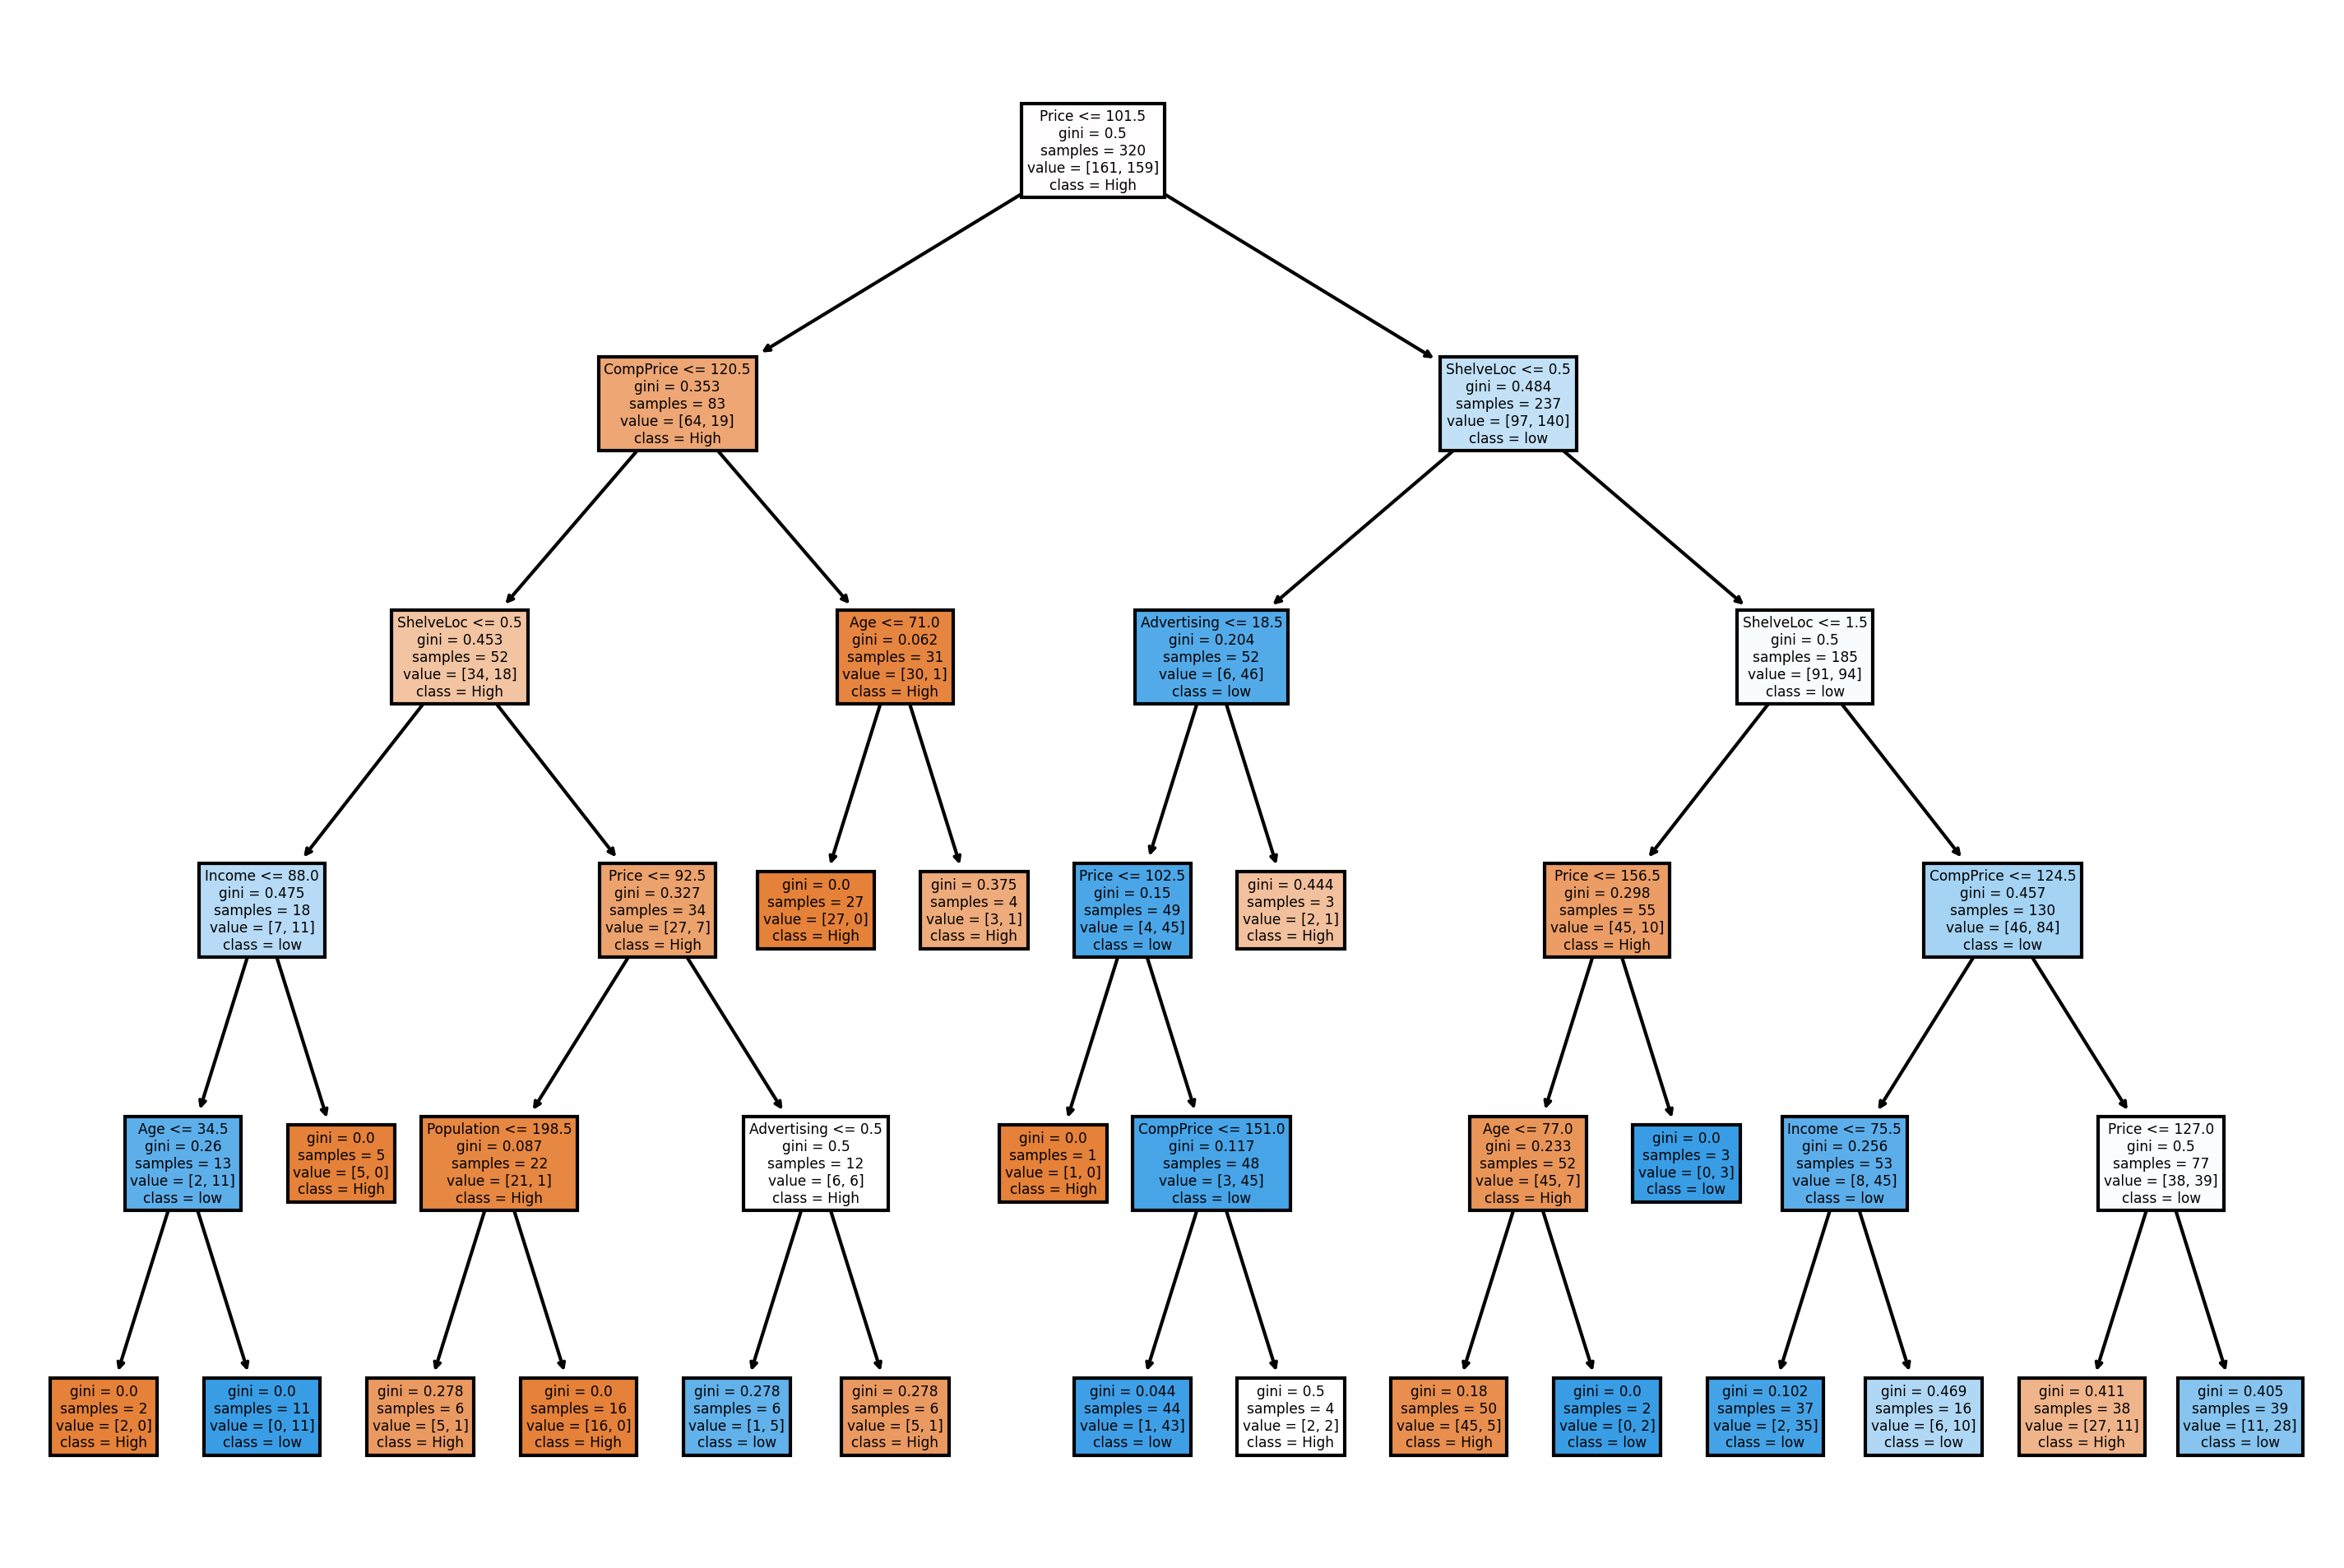

In [21]:
fn=['CompPrice','Income',	'Advertising',	'Population','Price',	'ShelveLoc','Age','Education','Urban','US']
cn=["High","low"]
plt.figure(figsize=(12, 8), dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn, filled=True)

In [22]:
model.score(x_train,y_train)

0.865625

In [23]:
pred=model.predict(x_test)


In [24]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

        High       0.76      0.82      0.78        38
         Low       0.82      0.76      0.79        42

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [25]:
model.feature_importances_

array([0.13332681, 0.0774342 , 0.04768899, 0.00251228, 0.33513631,
       0.33202786, 0.07187355, 0.        , 0.        , 0.        ])

#Model using entropy

In [26]:
model2 = DecisionTreeClassifier(criterion='entropy',min_samples_split=5,max_depth=10,)

In [27]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [28]:
pred2=model2.predict(x_test)


In [29]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

        High       0.78      0.84      0.81        38
         Low       0.85      0.79      0.81        42

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



[Text(0.35638297872340424, 0.9545454545454546, 'Price <= 101.5\nentropy = 1.0\nsamples = 320\nvalue = [161, 159]\nclass = High'),
 Text(0.14361702127659576, 0.8636363636363636, 'CompPrice <= 123.5\nentropy = 0.776\nsamples = 83\nvalue = [64, 19]\nclass = High'),
 Text(0.12234042553191489, 0.7727272727272727, 'ShelveLoc <= 0.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]\nclass = High'),
 Text(0.06382978723404255, 0.6818181818181818, 'Income <= 80.0\nentropy = 0.985\nsamples = 21\nvalue = [9, 12]\nclass = low'),
 Text(0.0425531914893617, 0.5909090909090909, 'Age <= 34.5\nentropy = 0.722\nsamples = 15\nvalue = [3, 12]\nclass = low'),
 Text(0.02127659574468085, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = High'),
 Text(0.06382978723404255, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = low'),
 Text(0.0851063829787234, 0.5909090909090909, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = High'),
 Text(0.18085106382978725, 0.6818181818181818, 'Price <= 92.5\

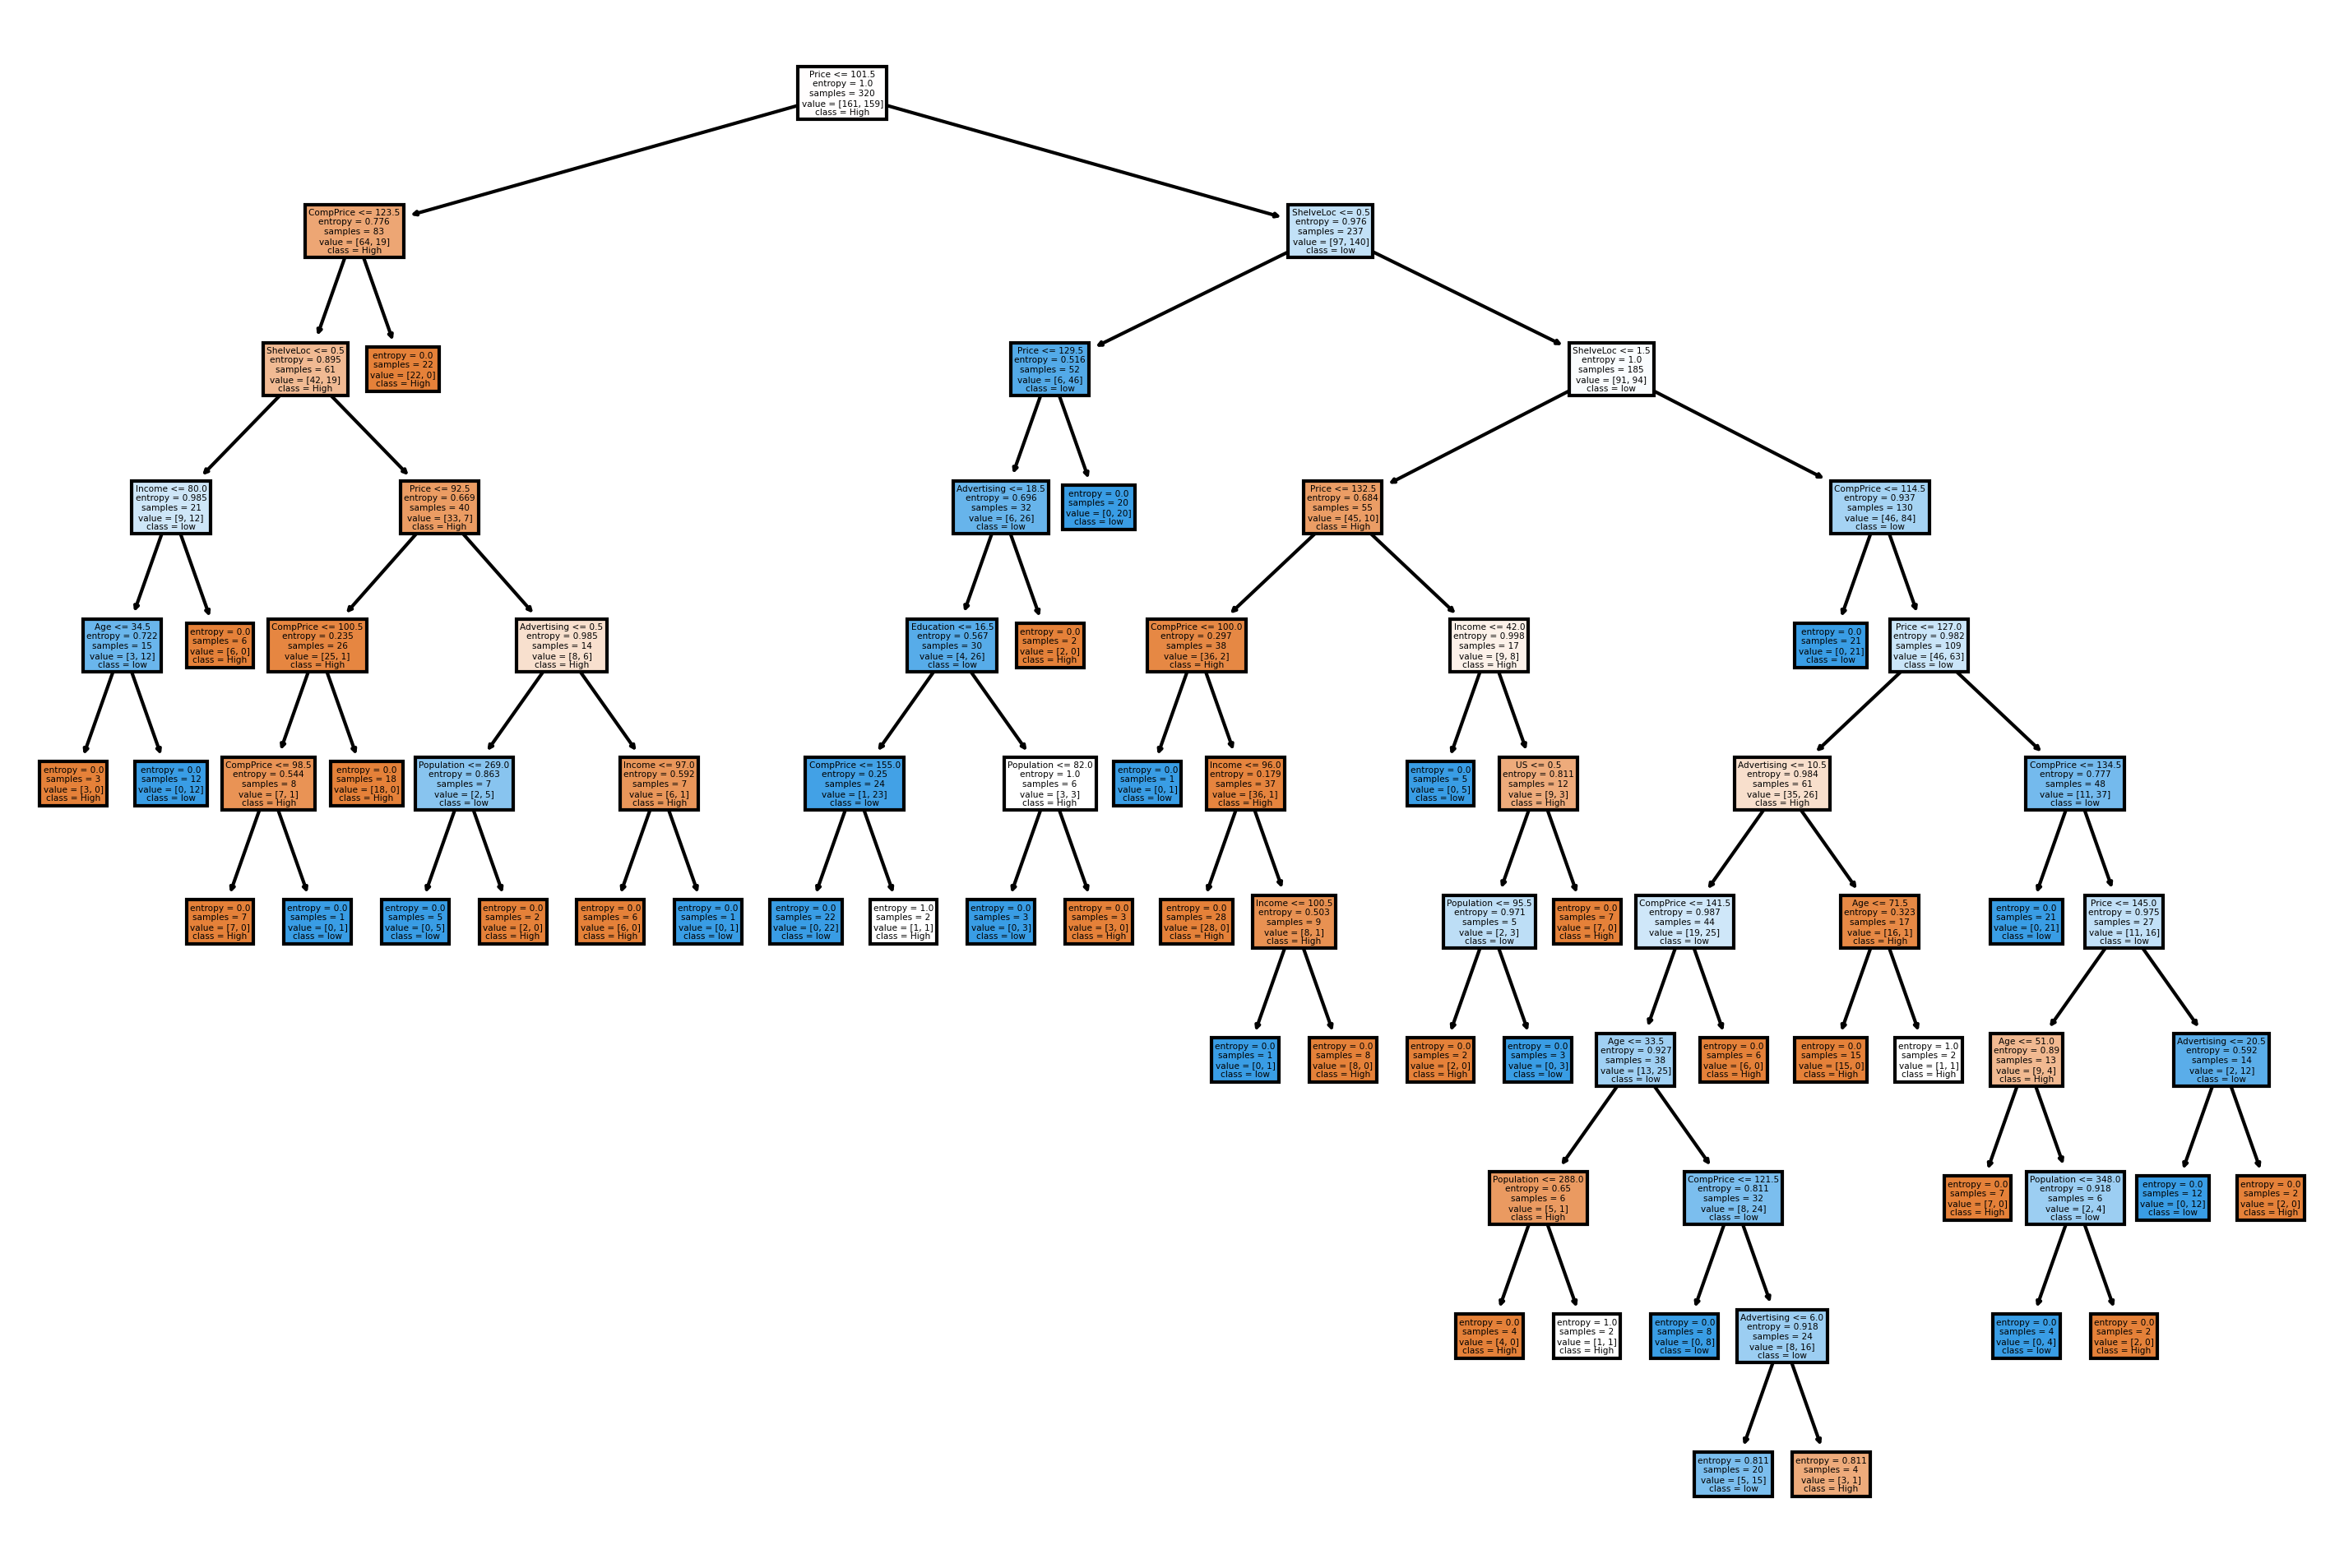

In [30]:
fn=['CompPrice','Income',	'Advertising',	'Population','Price',	'ShelveLoc','Age','Education','Urban','US']
cn=["High","low"]
plt.figure(figsize=(12, 8), dpi=300)  # Adjust the figure size as needed
tree.plot_tree(model2,feature_names=fn,class_names=cn, filled=True)